In [1]:
import pandas as pd
import pickle
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import scattertext as st

In [2]:
# Function to display basic sentiment results.
# Print out average, most positive, and most negative sentiment scores (and associated tweets).

def sentiment_report(df):
    print(f"Average Sentiment Score: {np.mean(df.score):.3f}")
    
    print("\n")

    print("Most Positive Tweet:", df.iloc[df.score.idxmax()]["Text"])
    print(f"Sentiment Score: {df.iloc[df.score.idxmax()]['score']: .3f}")

    print("\n")

    print("Most Negative Tweet:", df.iloc[df.score.idxmin()]["Text"])
    print(f"Sentiment Score: {df.iloc[df.score.idxmin()]['score']: .3f}")
    
    print("\n")

    print("Most Favorited Tweet:", df.iloc[df.Favorite_Count.idxmax()]["Text"])
    print(f"Sentiment Score: {df.iloc[df.Favorite_Count.idxmax()]['score']: .3f}")
    print(f"Number of Favorites: {df.iloc[df.Favorite_Count.idxmax()]['Favorite_Count']: .0f}")

    print("\n")

    print("Most Retweeted Tweet:", df.iloc[df.Retweet_Count.idxmax()]["Text"])
    print(f"Sentiment Score: {df.iloc[df.Retweet_Count.idxmax()]['score']: .3f}")
    print(f"Number of Retweets: {df.iloc[df.Retweet_Count.idxmax()]['Retweet_Count']: .0f}")

    

# Start with examining the initial twitter search (regular terms, not hashtags)

In [3]:
with open('./data/df_no_hashtags.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Created          10000 non-null  datetime64[ns, UTC]
 1   User_ID          10000 non-null  float64            
 2   User_Name        10000 non-null  object             
 3   Text             10000 non-null  object             
 4   Description      10000 non-null  object             
 5   Location         10000 non-null  object             
 6   Followers_Count  10000 non-null  float64            
 7   Friends_Count    10000 non-null  float64            
 8   Favorite_Count   10000 non-null  float64            
 9   Retweet_Count    10000 non-null  float64            
 10  spacy_doc        10000 non-null  object             
 11  docs_clean       10000 non-null  object             
 12  Text_clean       10000 non-null  object             
 13  Politics         

In [5]:
# Calculate Sentiment score.

# Using raw text from tweets (NOT cleaned version).
analyzer = SentimentIntensityAnalyzer()
df['score'] = df.Text.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

In [6]:
sentiment_report(df)

Average Sentiment Score: 0.178


Most Positive Tweet: RT @Sandyy_Dunes: 𝘽𝙖𝙧𝙪𝙣'𝙨 𝙉𝙚𝙬 𝙔𝙚𝙖𝙧 𝙧𝙚𝙨𝙤𝙡𝙪𝙩𝙞𝙤𝙣🤣🤣🤣🤣😘😘❣️❣️

"New Year Resolution - buy another pair of denims 👖

#happynewyear #2022"

https:/…
Sentiment Score:  0.979


Most Negative Tweet: @wieyngi NO CAN WE PLS 😭😭😭😭😭😭😭😭😭😭😭😭😭😭 it’s acc my new yeArs resolution to travel loads of places by myself this yea… https://t.co/y1G3NmhvAG
Sentiment Score: -0.992


Most Favorited Tweet: New Years resolution…..if it ain’t broke don’t fix it ☔️ https://t.co/cQrQCx6rq8
Sentiment Score: -0.421
Number of Favorites:  16587


Most Retweeted Tweet: RT @kiersi: my only 2022 resolution https://t.co/7esYQU5mNl
Sentiment Score:  0.000
Number of Retweets:  9282


In [7]:
sentiment_report(df.query("Travel == True").reset_index())

Average Sentiment Score: 0.497


Most Positive Tweet: RT @michaelbt718: 🎉NEW YEAR’S GIVEAWAY 🎉

To enter you need to:
*RETWEET &amp; LIKE❤️♻️
*FOLLOW ME‼️
*COMMENT YOUR NEW YEARS RESOLUTION🚨

Ends…
Sentiment Score:  0.824


Most Negative Tweet: RT @ollysmithtravel: My New Year's resolution is to tweet less about Covid and more about travel. 

So here are the countries at the top of…
Sentiment Score:  0.202


Most Favorited Tweet: my 2022 new years resolution is to prioritize self care and treating myself. Therefore, buying the new bundle is justifiable, okay?
Sentiment Score:  0.625
Number of Favorites:  343


Most Retweeted Tweet: RT @michaelbt718: 🎉NEW YEAR’S GIVEAWAY 🎉

To enter you need to:
*RETWEET &amp; LIKE❤️♻️
*FOLLOW ME‼️
*COMMENT YOUR NEW YEARS RESOLUTION🚨

Ends…
Sentiment Score:  0.824
Number of Retweets:  487


In [8]:
sentiment_report(df.query("Politics == True").reset_index())

Average Sentiment Score: -0.003


Most Positive Tweet: RT @aseitzwald: The polarization of Jan. 6 is not just a Washington thing. Here's 49 of 54 Republicans (90%) present in the Maine House vot…
Sentiment Score:  0.000


Most Negative Tweet: RT @randybillings: A spokesman said the caucus has no formal position, even though 49 of 54 House Republicans present opposed the resolutio…
Sentiment Score: -0.296


Most Favorited Tweet: The polarization of Jan. 6 is not just a Washington thing. Here's 49 of 54 Republicans (90%) present in the Maine H… https://t.co/nXAGuaY3Nl
Sentiment Score:  0.000
Number of Favorites:  658


Most Retweeted Tweet: RT @aseitzwald: The polarization of Jan. 6 is not just a Washington thing. Here's 49 of 54 Republicans (90%) present in the Maine House vot…
Sentiment Score:  0.000
Number of Retweets:  342


In [9]:
sentiment_report(df.query("Giveaways == True").reset_index())

Average Sentiment Score: 0.692


Most Positive Tweet: RT @michaelbt718: 🎉NEW YEAR’S GIVEAWAY 🎉

To enter you need to:
*RETWEET &amp; LIKE❤️♻️
*FOLLOW ME‼️
*COMMENT YOUR NEW YEARS RESOLUTION🚨

Ends…
Sentiment Score:  0.824


Most Negative Tweet: RT @ZachCR_: ⚠️5x New Year Pass Royale Giveaway!!⚠️

How to enter:

Follow ✅
Retweet 🔁
Like ❤️
Comment New Years Resolution💬

[OPTIONAL] —…
Sentiment Score:  0.474


Most Favorited Tweet: RT @isoroomnft: [2️⃣0️⃣2️⃣2️⃣isoroom New Year Giveaway!🎉]

2021, you brought our isofam together, we are grateful.
2022, will you bring us…
Sentiment Score:  0.718
Number of Favorites:  0


Most Retweeted Tweet: RT @isoroomnft: [2️⃣0️⃣2️⃣2️⃣isoroom New Year Giveaway!🎉]

2021, you brought our isofam together, we are grateful.
2022, will you bring us…
Sentiment Score:  0.718
Number of Retweets:  1504


In [10]:
sentiment_report(df.query("Finances == True").reset_index())

Average Sentiment Score: 0.302


Most Positive Tweet: 2022 resolution: Be more financial stable!
💸 I am walking in financial freedom, I am thankful that every single one… https://t.co/lT2uV9HovD
Sentiment Score:  0.893


Most Negative Tweet: RT @AJEnglish: Iran says it has begun paying families over downed Ukraine International Airlines Flight that killed 176 people https://t.co…
Sentiment Score: -0.670


Most Favorited Tweet: Iran says it has begun paying families over downed Ukraine International Airlines Flight that killed 176 people… https://t.co/TAdG3ZqnPd
Sentiment Score: -0.670
Number of Favorites:  181


Most Retweeted Tweet: RT @ossia: Take the 2022 Become-a-Dev New Year's Resolution Challenge:
📊Max your stats in #LearnToCodeRPG
⌨️Start #100DaysOfCode
🛢️Finish t…
Sentiment Score:  0.077
Number of Retweets:  408


In [11]:
sentiment_report(df.query("Hopes_Dreams == True").reset_index())

Average Sentiment Score: 0.367


Most Positive Tweet: RT @WhatsApp: 📝 A new year means new goals, hopes, and dreams. This week we’ve been reflecting on a few resolution ideas to share for some…
Sentiment Score:  0.772


Most Negative Tweet: RT @UN: Kazakhstan: Amid violence in the country, @UNHumanRights chief @MBachelet urges security forces, protesters and all others, to refr…
Sentiment Score: -0.557


Most Favorited Tweet: 📝 A new year means new goals, hopes, and dreams. This week we’ve been reflecting on a few resolution ideas to share… https://t.co/K5XFC4yjfC
Sentiment Score:  0.670
Number of Favorites:  1244


Most Retweeted Tweet: RT @nrlsyirahfaisal: PETITION FOR KFC TO BRING BACK CHEESY BBQ MELTS AND KEEP IT A PERMANENT DISH IN THE MENU PLEASE 2022 RESOLUTION AH htt…
Sentiment Score:  0.465
Number of Retweets:  2069


In [12]:
sentiment_report(df.query("New_Beginnings == True").reset_index())

Average Sentiment Score: 0.522


Most Positive Tweet: RT @antonioguterres: Moments of great difficulty are also moments of great opportunity.

To come together in solidarity &amp; move forward with…
Sentiment Score:  0.896


Most Negative Tweet: RT @AJEnglish: Iran says it has begun paying families over downed Ukraine International Airlines Flight that killed 176 people https://t.co…
Sentiment Score: -0.670


Most Favorited Tweet: Iran says it has begun paying families over downed Ukraine International Airlines Flight that killed 176 people… https://t.co/TAdG3ZqnPd
Sentiment Score: -0.670
Number of Favorites:  181


Most Retweeted Tweet: RT @antonioguterres: Moments of great difficulty are also moments of great opportunity:

To come together in solidarity.

To unite behind s…
Sentiment Score:  0.896
Number of Retweets:  670


# Now examine the hashtags tweets.

In [13]:
with open('./data/df_with_hashtags.pickle','rb') as read_file:
    df2 = pickle.load(read_file)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6660 entries, 0 to 6659
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Created              6660 non-null   datetime64[ns, UTC]
 1   User_ID              6660 non-null   float64            
 2   User_Name            6660 non-null   object             
 3   Text                 6660 non-null   object             
 4   Description          6660 non-null   object             
 5   Location             6660 non-null   object             
 6   Followers_Count      6660 non-null   float64            
 7   Friends_Count        6660 non-null   float64            
 8   Favorite_Count       6660 non-null   float64            
 9   Retweet_Count        6660 non-null   float64            
 10  spacy_doc            6660 non-null   object             
 11  docs_clean           6660 non-null   object             
 12  Text_clean          

In [15]:
# Calculate Sentiment score.

# Using raw text from tweets (NOT cleaned version).
analyzer = SentimentIntensityAnalyzer()
df2['score'] = df2.Text.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

In [16]:
sentiment_report(df2)

Average Sentiment Score: 0.081


Most Positive Tweet: Resolve to read more in 2022. ✨  ✨ ✨ Staff pick. 💖 💖 💖 Life is changing for a small community of Pacific NW loggers… https://t.co/GFP3ZNQpFb
Sentiment Score:  0.980


Most Negative Tweet: Officially #single 😬😭😭😭😁😁😁😭😭😭😭😭😁😁😁😭😭😭😭😭😭😭😭😭😭😁😁😭😭😭😭😭😁😁😭😭😭😭😭#30s #California #Norcal #40s #divorce #divorceclub… https://t.co/dAbM9qQxPS
Sentiment Score: -0.995


Most Favorited Tweet: Check this out‼️

🥳Start off 2022 with a bang💥and grab $NYR on it's way to the moon!🚀
 
 @NYR_Community has the sam… https://t.co/ex8u6Cc9iy
Sentiment Score:  0.439
Number of Favorites:  496


Most Retweeted Tweet: RT @SatlokChannel: Is Drinking Alcohol a Sin?
Sant Garibdas ji says
Madira peevae kadva paani, sattar janm shwaan ke jaani.
A person, who d…
Sentiment Score: -0.557
Number of Retweets:  3620


In [17]:
sentiment_report(df2.query("Alcohol == True").reset_index())

Average Sentiment Score: -0.294


Most Positive Tweet: RT @DSundar007: #NewYearResolution
One Should never consume
Alcohol in any form, not even by mistake.
To know more, get free🆓 book📒
"Way Of…
Sentiment Score:  0.872


Most Negative Tweet: RT @LAXMIKU21656640: #NewYearResolution
#GodMorningSaturday
Stop Drinking Alcohol
Alcohol is such a dangerous evil that destroys even a hap…
Sentiment Score: -0.923


Most Favorited Tweet: #NewYearResolution
#GodMorningMonday
Whether intoxication is of alcohol, hemp, opium, heroine etc, it will become a… https://t.co/o9rE0OPGPf
Sentiment Score:  0.572
Number of Favorites:  5


Most Retweeted Tweet: RT @SatlokChannel: Is Drinking Alcohol a Sin?
Sant Garibdas ji says
Madira peevae kadva paani, sattar janm shwaan ke jaani.
A person, who d…
Sentiment Score: -0.557
Number of Retweets:  3620


In [18]:
sentiment_report(df2.query("Vegan == True").reset_index())

Average Sentiment Score: -0.194


Most Positive Tweet: We've got to keep it together for the animals! 🤣
Look after yourselves, give your pets all the kindness and care th… https://t.co/HI9J4PiJlW
Sentiment Score:  0.866


Most Negative Tweet: RT @Supinderdass1: #NewYearResolution
The man who use to eat meat 🍖, 🍷 drink alcohol and does any kind of evil he has s not ....
HINDU...
M…
Sentiment Score: -0.690


Most Favorited Tweet: If your #NewYearsResolution is to be healthy, kinder to the planet AND animals, consider this ☝️ https://t.co/ZLcGzokk0P
Sentiment Score:  0.710
Number of Favorites:  28


Most Retweeted Tweet: RT @simple_LivingR: #NewYearResolution
Those, who eat meat as well as who drink alcohol &amp; practice adultery are beheaded for 70 births in t…
Sentiment Score:  0.273
Number of Retweets:  1408


## Create figure for average sentiment analysis.

In [19]:
topic_lst = ["Politics", "Giveaways", "Finances", "Travel", "Hopes_Dreams",
             "New_Beginnings", "K_Pop_Band"]

sentiment_lst = []

for x in topic_lst:
    sentiment_lst.append(np.mean(df.query(f"{x} == True").score))

In [20]:
topic_lst2 = ["Alcohol", "Vegan"]

for x in topic_lst2:
    query_search = f"{x} == True"
    sentiment_lst.append(np.mean(df2.query(query_search).score))

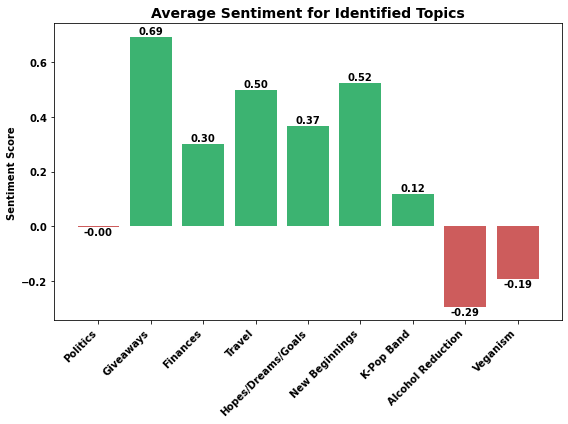

In [21]:
names_lst = topic_lst + topic_lst2
labels = ["Politics", "Giveaways", "Finances", "Travel", "Hopes/Dreams/Goals",
             "New Beginnings", "K-Pop Band", "Alcohol Reduction", "Veganism"]
colors = [("indianred" if x < 0 else "mediumseagreen") for x in sentiment_lst]

plt.figure(figsize=(8, 6))

plt.bar(names_lst, sentiment_lst, color = colors)

plt.title("Average Sentiment for Identified Topics", weight = "bold", size=14)
plt.xticks(names_lst, labels, rotation = 45, ha='right', weight = "bold")
plt.ylabel("Sentiment Score", weight="bold")
plt.yticks(weight = "bold")

for i,v in enumerate(sentiment_lst):
    if v < 0:
        plt.text(i, v-0.03, f"{v:.2f}", ha = "center", color='k', fontweight='bold')
    else:
        plt.text(i, v+0.01, f"{v:.2f}", ha = "center", color='k', fontweight='bold')

plt.tight_layout();
plt.savefig('./Figures/sentiment_graph.png', dpi=200)

## Scattertext Figure.

In [27]:
df_scatter = pd.concat([df[["score", "Text", "User_ID"]], df2[["score", "Text", "User_ID"]]])
df_scatter = df_scatter.query("score != 0.0")

df_scatter["sentiment"] = df_scatter.score.map(lambda x: "Positive" if x>0 else "Negative")

In [28]:
df_scatter["sentiment"].value_counts()

Positive    8056
Negative    3954
Name: sentiment, dtype: int64

In [29]:
# Build the corpus.

corpus = st.CorpusFromPandas(
    df_scatter,
    category_col =  "sentiment",
    text_col = "Text", 
    nlp=st.whitespace_nlp_with_sentences
).build()

In [30]:
# Create the HTML.

html = st.produce_scattertext_explorer(
        corpus,
        category= "Positive", 
        category_name=  "Positive", 
        not_category_name= "Negative", 
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df_scatter['User_ID'],
        )

In [31]:
# Explore the HTML.

open('./Figures/tweet_sentiment.html', 'wb').write(html.encode('utf-8'));

## Explore potential differences in twitter search term datasets.

In [44]:
print(f"For text download, Mean followers: {np.mean(df.Followers_Count):.1f}, \
Mean friends: {np.mean(df.Friends_Count):.1f}, Mean favorites: {np.mean(df.Favorite_Count):.1f}, \
Mean retweets: {np.mean(df.Retweet_Count):.1f}")

print(f"For hashtag download, Mean followers: {np.mean(df2.Followers_Count):.1f}, \
Mean friends: {np.mean(df2.Friends_Count):.1f}, Mean favorites: {np.mean(df2.Favorite_Count):.1f}, \
Mean retweets: {np.mean(df2.Retweet_Count):.1f}")

For text download, Mean followers: 17279.4, Mean friends: 1288.9, Mean favorites: 7.5, Mean retweets: 74.7
For hashtag download, Mean followers: 3006.8, Mean friends: 1211.2, Mean favorites: 0.6, Mean retweets: 217.6


In [45]:
print(f"For text download, Median followers: {np.median(df.Followers_Count):.1f}, \
Median friends: {np.median(df.Friends_Count):.1f}, Median favorites: {np.median(df.Favorite_Count):.1f}, \
Median retweets: {np.median(df.Retweet_Count):.1f}")

print(f"For hashtag download, Median followers: {np.median(df2.Followers_Count):.1f}, \
Median friends: {np.median(df2.Friends_Count):.1f}, Median favorites: {np.median(df2.Favorite_Count):.1f}, \
Median retweets: {np.median(df2.Retweet_Count):.1f}")

For text download, Median followers: 354.0, Median friends: 418.0, Median favorites: 0.0, Median retweets: 0.0
For hashtag download, Median followers: 196.0, Median friends: 214.0, Median favorites: 0.0, Median retweets: 5.0
